In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [2]:
homeprice = pd.read_csv('./homeprices.csv')
homeprice

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


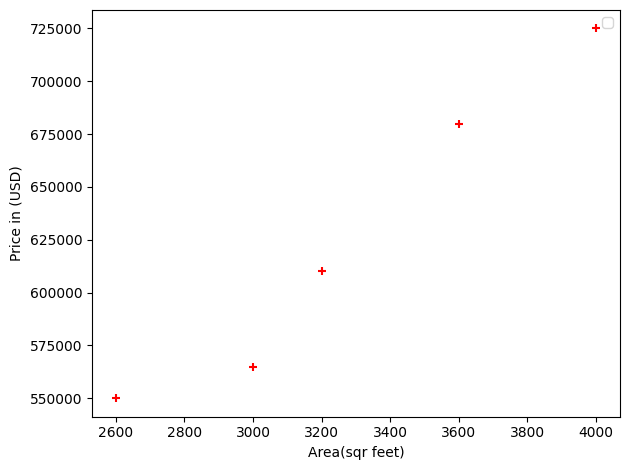

In [3]:
plt.scatter(homeprice['area'],homeprice['price'], color='red', marker='+')
plt.xlabel('Area(sqr feet)')
plt.ylabel('Price in (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
reg = linear_model.LinearRegression()
reg.fit(homeprice[['area']],homeprice.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

/home/ibande/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
# y=mx+b
135.78767123*3300+180616.43835616432

628715.7534151643

In [8]:
reg.predict([[5000]])

/home/ibande/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [9]:
price_predict = pd.read_csv('./areas.csv')
price_predict

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [10]:
price_predict['price']=reg.predict(price_predict)

In [11]:
price_predict

,area,price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [20]:
price_predict.to_csv('prediction.csv',index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


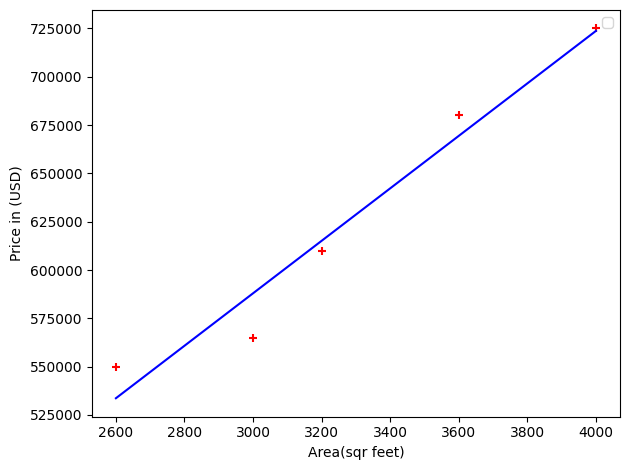

In [12]:
plt.scatter(homeprice['area'],homeprice['price'], color='red', marker='+')
plt.plot(homeprice['area'],reg.predict(homeprice[['area']]),color='blue')
plt.xlabel('Area(sqr feet)')
plt.ylabel('Price in (USD)')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
reg.score(homeprice[['area']],homeprice['price'])

0.9584301138199486